In [1]:
# Random Forest Classifier

# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# load dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True)

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=2529)

# select model
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

# train model
rfc.fit(X_train, y_train)

# predict
y_pred = rfc.predict(X_test)

# accuracy
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

print("Number of mislabeled points out of a total %d points : %d"
      % (X_test.shape[0], (y_test != y_pred).sum()))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94        64
           1       0.95      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171

Number of mislabeled points out of a total 171 points : 8


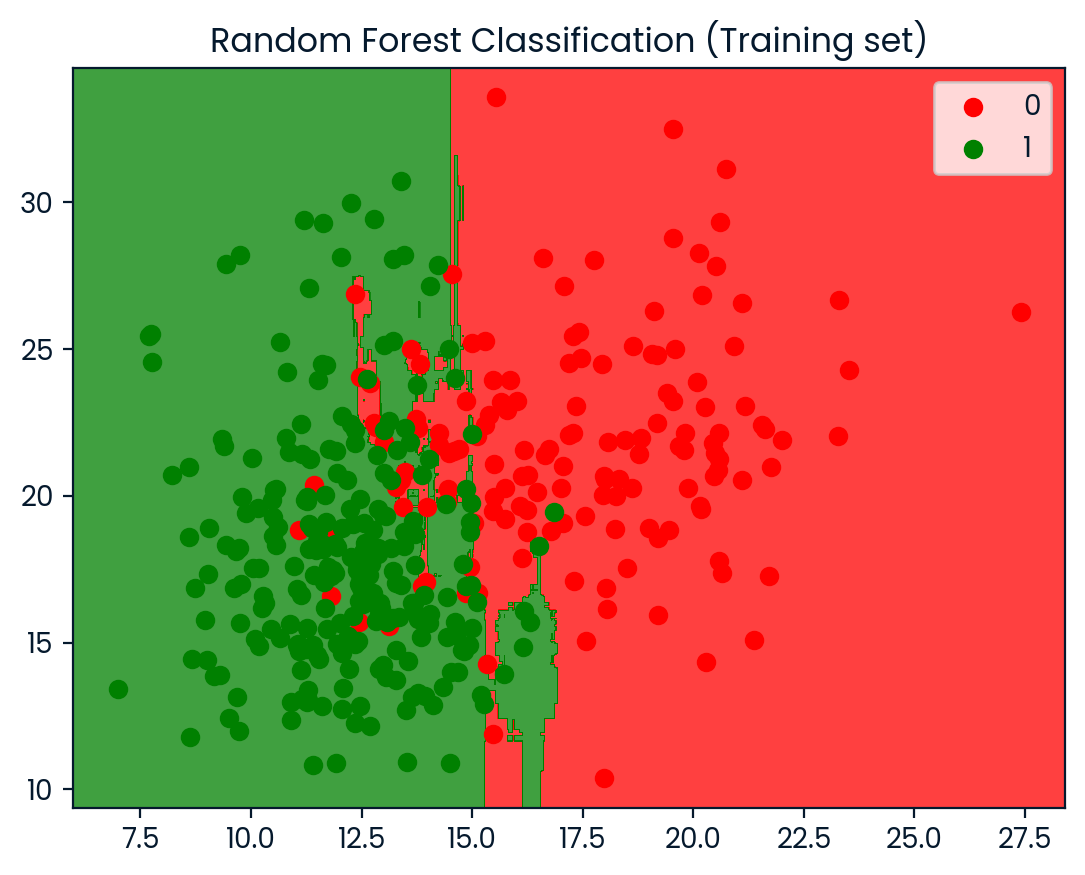

In [2]:
# Visualizing the train results

from matplotlib.colors import ListedColormap
X_set, y_set = X_train[:,0:2], y_train
rfc.fit(X_set,y_set)
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, rfc.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Random Forest Classification (Training set)')
#plt.xlabel(X_train.columns[0])
#plt.ylabel(y_set.columns)
plt.legend()
plt.show()

In [3]:
# hyperparameter tuning

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators': [100,200,300,400,500],
              'max_depth': range(1,10),
              'criterion':['gini','entropy']}
grid = GridSearchCV(estimator = rfc,
                           param_grid = parameters,
                           scoring = 'recall',
                           cv = 5)


#4 train grid
grid.fit(X_train,y_train)

print(grid.best_score_)
print(grid.best_params_)

#5 predict grid
y_pred = grid.predict(X_test)

#6 evaluation grid
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

0.984
{'criterion': 'entropy', 'max_depth': 5, 'n_estimators': 300}
              precision    recall  f1-score   support

           0       0.95      0.88      0.91        64
           1       0.93      0.97      0.95       107

    accuracy                           0.94       171
   macro avg       0.94      0.92      0.93       171
weighted avg       0.94      0.94      0.94       171

